In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
df = pd.read_csv('5_gurgaon_properties_missing_value_imputation.csv')

In [ ]:
df.shape

(3557, 19)

In [ ]:
df.head()

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,pred,luxury_score
0,flat,godrej,sector 79,1.30,8270.0,2.0,2.0,3,3.0,New Property,1423.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,49.0
1,flat,trisara our homes 3,sohna road,0.21,4339.0,1.0,1.0,0,2.0,Relatively New,484.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,flat,experion the heartsong,sector 108,0.90,7015.0,2.0,3.0,3,7.0,Relatively New,1161.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,72.0
3,house,house number b-34,sector 5,0.80,8889.0,2.0,2.0,1,1.0,Old Property,900.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,flat,smart world gems,sector 89,1.13,8503.0,3.0,3.0,2,4.0,New Property,1473.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,115.0


In [ ]:
# society and price_per_sqft are needed for our analysis
# we wont asking these column from user
train_df = df.drop(columns=['society','price_per_sqft'])

In [ ]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,pred,luxury_score
0,flat,sector 79,1.30,2.0,2.0,3,3.0,New Property,1423.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,49.0
1,flat,sohna road,0.21,1.0,1.0,0,2.0,Relatively New,484.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,flat,sector 108,0.90,2.0,3.0,3,7.0,Relatively New,1161.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,72.0
3,house,sector 5,0.80,2.0,2.0,1,1.0,Old Property,900.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,flat,sector 89,1.13,3.0,3.0,2,4.0,New Property,1473.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,115.0


<ipython-input-8-29eb114f537c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_df.corr())


<Axes: >

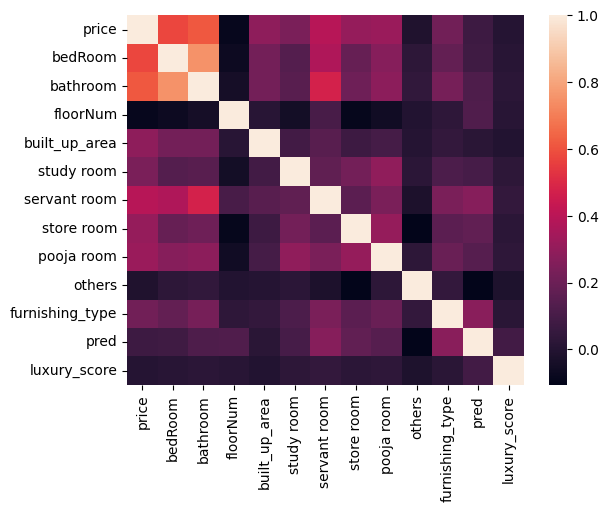

In [ ]:
sns.heatmap(train_df.corr())

In [ ]:
# features like others, floor num, luxury score don't linear correlation to price column
train_df.corr()['price'].sort_values(ascending=False)

<ipython-input-9-66a609ddd5b0>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_df.corr()['price'].sort_values(ascending=False)


price              1.000000
bathroom           0.611272
bedRoom            0.572743
servant room       0.392136
pooja room         0.321691
store room         0.307629
built_up_area      0.290503
study room         0.239457
furnishing_type    0.216420
pred               0.075423
luxury_score       0.005068
others            -0.014014
floorNum          -0.087444
Name: price, dtype: float64

### luxury score

<Axes: >

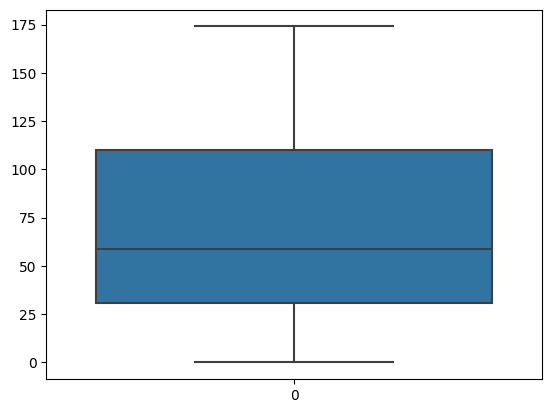

In [ ]:
#Convert luxury score into classification
sns.boxplot(df['luxury_score'])

In [ ]:
def categorize_luxury(score):
    if 0 <= score < 50:
        return "Low"
    elif 50 <= score < 150:
        return "Medium"
    elif 150 <= score <= 175:
        return "High"
    else:
        return None  # or "Undefined" or any other label for scores outside the defined bins

In [ ]:
train_df['luxury_category'] = train_df['luxury_score'].apply(categorize_luxury)

In [ ]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,pred,luxury_score,luxury_category
0,flat,sector 79,1.30,2.0,2.0,3,3.0,New Property,1423.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,49.0,Low
1,flat,sohna road,0.21,1.0,1.0,0,2.0,Relatively New,484.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Low
2,flat,sector 108,0.90,2.0,3.0,3,7.0,Relatively New,1161.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,72.0,Medium
3,house,sector 5,0.80,2.0,2.0,1,1.0,Old Property,900.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Low
4,flat,sector 89,1.13,3.0,3.0,2,4.0,New Property,1473.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,115.0,Medium


### floorNum

<Axes: >

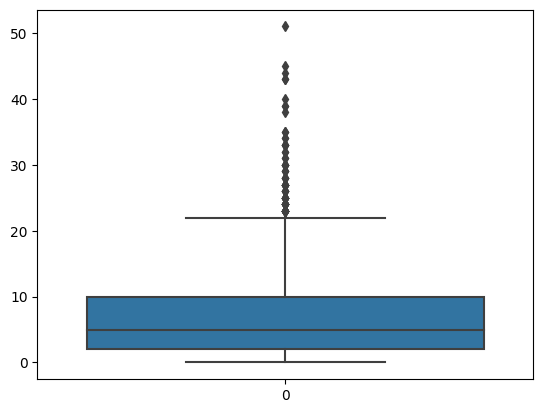

In [ ]:
# Convert into categories
sns.boxplot(df['floorNum'])

In [ ]:
def categorize_floor(floor):
    if 0 <= floor <= 2:
        return "Low Floor"
    elif 3 <= floor <= 10:
        return "Mid Floor"
    elif 11 <= floor <= 51:
        return "High Floor"
    else:
        return None  # or "Undefined" or any other label for floors outside the defined bins

In [ ]:
train_df['floor_category'] = train_df['floorNum'].apply(categorize_floor)

In [ ]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,pred,luxury_score,luxury_category,floor_category
0,flat,sector 79,1.30,2.0,2.0,3,3.0,New Property,1423.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,49.0,Low,Mid Floor
1,flat,sohna road,0.21,1.0,1.0,0,2.0,Relatively New,484.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Low,Low Floor
2,flat,sector 108,0.90,2.0,3.0,3,7.0,Relatively New,1161.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,72.0,Medium,Mid Floor
3,house,sector 5,0.80,2.0,2.0,1,1.0,Old Property,900.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Low,Low Floor
4,flat,sector 89,1.13,3.0,3.0,2,4.0,New Property,1473.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,115.0,Medium,Mid Floor


In [ ]:
train_df.drop(columns=['floorNum','luxury_score'],inplace=True)

In [ ]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,pred,luxury_category,floor_category
0,flat,sector 79,1.30,2.0,2.0,3,New Property,1423.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Low,Mid Floor
1,flat,sohna road,0.21,1.0,1.0,0,Relatively New,484.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Low,Low Floor
2,flat,sector 108,0.90,2.0,3.0,3,Relatively New,1161.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,Medium,Mid Floor
3,house,sector 5,0.80,2.0,2.0,1,Old Property,900.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Low,Low Floor
4,flat,sector 89,1.13,3.0,3.0,2,New Property,1473.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,Medium,Mid Floor


In [ ]:
from sklearn.preprocessing import OrdinalEncoder

# Create a copy of the original data for label encoding
data_label_encoded = train_df.copy()

categorical_cols = train_df.select_dtypes(include=['object']).columns       ###

# Apply label encoding to categorical columns
for col in categorical_cols:
    oe = OrdinalEncoder()
    data_label_encoded[col] = oe.fit_transform(data_label_encoded[[col]])
    print(oe.categories_)

# Splitting the dataset into training and testing sets
X_label = data_label_encoded.drop('price', axis=1)
y_label = data_label_encoded['price']

[array(['flat', 'house'], dtype=object)]
[array(['dwarka expressway', 'gwal pahari', 'manesar', 'new',
       'new sector 2', 'sector 1', 'sector 102', 'sector 103',
       'sector 104', 'sector 105', 'sector 106', 'sector 107',
       'sector 108', 'sector 109', 'sector 10a', 'sector 11',
       'sector 110', 'sector 111', 'sector 112', 'sector 113',
       'sector 12', 'sector 13', 'sector 14', 'sector 15', 'sector 17',
       'sector 17a', 'sector 17b', 'sector 2', 'sector 21', 'sector 22',
       'sector 23', 'sector 24', 'sector 25', 'sector 26', 'sector 27',
       'sector 28', 'sector 3', 'sector 3 phase 2',
       'sector 3 phase 3 extension', 'sector 30', 'sector 31',
       'sector 33', 'sector 36', 'sector 36a', 'sector 37', 'sector 37c',
       'sector 37d', 'sector 38', 'sector 39', 'sector 4', 'sector 40',
       'sector 41', 'sector 43', 'sector 45', 'sector 46', 'sector 47',
       'sector 48', 'sector 49', 'sector 5', 'sector 50', 'sector 51',
       'sector 52', 'sect

In [ ]:
X_label

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,pred,luxury_category,floor_category
0,0.0,91.0,2.0,2.0,3.0,1.0,1423.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0
1,0.0,113.0,1.0,1.0,0.0,3.0,484.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,0.0,12.0,2.0,3.0,3.0,3.0,1161.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0,2.0
3,1.0,58.0,2.0,2.0,1.0,2.0,900.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
4,0.0,103.0,3.0,3.0,2.0,1.0,1473.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3552,0.0,111.0,3.0,5.0,3.0,3.0,1790.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,2.0
3553,0.0,6.0,4.0,5.0,4.0,3.0,2894.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,2.0
3554,0.0,65.0,3.0,3.0,3.0,2.0,1810.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,3.0,2.0
3555,1.0,58.0,5.0,4.0,2.0,2.0,2367.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,3.0,1.0


In [ ]:
y_label

0       1.30
1       0.21
2       0.90
3       0.80
4       1.13
        ... 
3552    1.13
3553    2.50
3554    1.55
3555    3.50
3556    3.00
Name: price, Length: 3557, dtype: float64

### Technique 1 - Correlation Analysis

<Axes: >

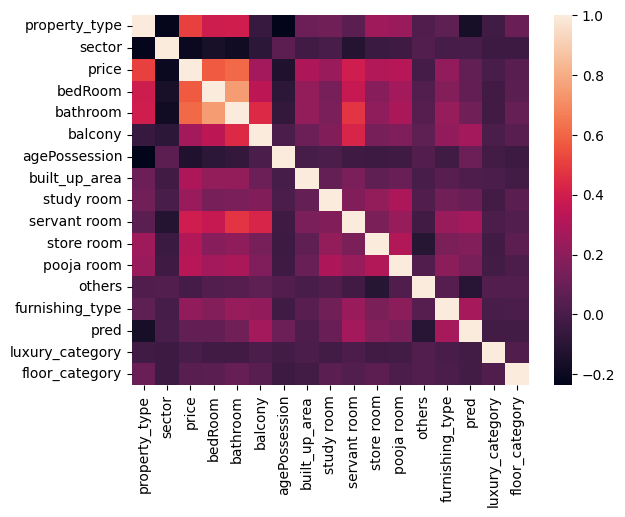

In [ ]:
 sns.heatmap(data_label_encoded.corr())

In [ ]:
fi_df1 = data_label_encoded.corr()['price'].iloc[1:].to_frame().reset_index().rename(columns={'index':'feature','price':'corr_coeff'})
fi_df1

,feature,corr_coeff
0,sector,-0.200712
1,price,1.000000
2,bedRoom,0.572743
3,bathroom,0.611272
4,balcony,0.270538
5,agePossession,-0.131448
6,built_up_area,0.290503
7,study room,0.239457
8,servant room,0.392136
9,store room,0.307629


### Technique 2 - Random Forest Feature Importance

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Train a Random Forest regressor on label encoded data
rf_label = RandomForestRegressor(n_estimators=100, random_state=42)
rf_label.fit(X_label, y_label)

# Extract feature importance scores for label encoded data
fi_df2 = pd.DataFrame({
    'feature': X_label.columns,
    'rf_importance': rf_label.feature_importances_
}).sort_values(by='rf_importance', ascending=False)

fi_df2

,feature,rf_importance
6,built_up_area,0.629244
0,property_type,0.108472
1,sector,0.105721
2,bedRoom,0.029021
3,bathroom,0.026472
8,servant room,0.023038
5,agePossession,0.013076
4,balcony,0.012880
14,luxury_category,0.012632
10,pooja room,0.007265


### Technique 3 - Gradient Boosting Feature importances

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Train a Random Forest regressor on label encoded data
gb_label = GradientBoostingRegressor()
gb_label.fit(X_label, y_label)

# Extract feature importance scores for label encoded data
fi_df3 = pd.DataFrame({
    'feature': X_label.columns,
    'gb_importance': gb_label.feature_importances_
}).sort_values(by='gb_importance', ascending=False)

fi_df3

,feature,gb_importance
6,built_up_area,0.658171
1,sector,0.108559
0,property_type,0.100967
2,bedRoom,0.041706
3,bathroom,0.039832
8,servant room,0.028986
9,store room,0.007922
14,luxury_category,0.005691
5,agePossession,0.002440
12,furnishing_type,0.001860


### Technique 4 - Permutation Importance

In [ ]:
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

X_train_label, X_test_label, y_train_label, y_test_label = train_test_split(X_label, y_label, test_size=0.2, random_state=42)

# Train a Random Forest regressor on label encoded data
rf_label = RandomForestRegressor(n_estimators=100, random_state=42)
rf_label.fit(X_train_label, y_train_label)

# Calculate Permutation Importance
perm_importance = permutation_importance(rf_label, X_test_label, y_test_label, n_repeats=30, random_state=42)

# Organize results into a DataFrame
fi_df4 = pd.DataFrame({
    'feature': X_label.columns,
    'permutation_importance': perm_importance.importances_mean
}).sort_values(by='permutation_importance', ascending=False)

fi_df4

,feature,permutation_importance
6,built_up_area,0.706961
0,property_type,0.229893
1,sector,0.178631
8,servant room,0.015845
3,bathroom,0.014467
2,bedRoom,0.013557
15,floor_category,0.003334
9,store room,0.002157
7,study room,0.002029
4,balcony,0.001980


### Technique 5 - LASSO

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_label)

# Train a LASSO regression model
# We'll use a relatively small value for alpha (the regularization strength) for demonstration purposes
lasso = Lasso(alpha=0.01, random_state=42)
lasso.fit(X_scaled, y_label)

# Extract coefficients
fi_df5 = pd.DataFrame({
    'feature': X_label.columns,
    'lasso_coeff': lasso.coef_
}).sort_values(by='lasso_coeff', ascending=False)

fi_df5


,feature,lasso_coeff
0,property_type,0.760618
3,bathroom,0.610713
2,bedRoom,0.456612
6,built_up_area,0.369537
8,servant room,0.355299
9,store room,0.248095
7,study room,0.217066
12,furnishing_type,0.124256
10,pooja room,0.113801
4,balcony,0.053758


### Technique 6 - RFE

In [ ]:
from sklearn.feature_selection import RFE

# Initialize the base estimator
estimator = RandomForestRegressor()

# Apply RFE on the label-encoded and standardized training data
selector_label = RFE(estimator, n_features_to_select=X_label.shape[1], step=1)
selector_label = selector_label.fit(X_train_label, y_train_label)

# Get the selected features based on RFE
selected_features = X_label.columns[selector_label.support_]

# Extract the coefficients for the selected features from the underlying linear regression model
selected_coefficients = selector_label.estimator_.feature_importances_

# Organize the results into a DataFrame
fi_df6 = pd.DataFrame({
    'feature': selected_features,
    'rfe_score': selected_coefficients
}).sort_values(by='rfe_score', ascending=False)

fi_df6


,feature,rfe_score
6,built_up_area,0.627642
0,property_type,0.121280
1,sector,0.095639
2,bedRoom,0.030373
3,bathroom,0.023809
8,servant room,0.021266
5,agePossession,0.014126
4,balcony,0.012199
14,luxury_category,0.011760
10,pooja room,0.008136


### Technique 7 - Linear Regression Weights

In [ ]:
# Train a linear regression model on the label-encoded and standardized training data
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_scaled, y_label)

# Extract coefficients
fi_df7 = pd.DataFrame({
    'feature': X_label.columns,
    'reg_coeffs': lin_reg.coef_
}).sort_values(by='reg_coeffs', ascending=False)

fi_df7


,feature,reg_coeffs
0,property_type,0.763002
3,bathroom,0.608129
2,bedRoom,0.457873
6,built_up_area,0.376213
8,servant room,0.359073
9,store room,0.253258
7,study room,0.223581
12,furnishing_type,0.133654
10,pooja room,0.117704
4,balcony,0.062783


### Technique 8 - SHAP

In [ ]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 533.5/533.5 kB 7.2 MB/s eta 0:00:00


In [ ]:
import shap

# Compute SHAP values using the trained Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_label, y_label)

explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_label)

# Summing the absolute SHAP values across all samples to get an overall measure of feature importance
shap_sum = np.abs(shap_values).mean(axis=0)

shap_values


array([[-1.87261490e-01, -1.75315976e-01, -6.66229507e-02, ...,
        -1.04322989e-02,  2.97854416e-03, -2.07448122e-03],
       [-1.95345143e-01, -4.44354194e-01, -6.74863900e-02, ...,
        -1.82259439e-03, -3.00923115e-04, -5.67111553e-03],
       [-2.24593757e-01, -2.29204435e-01, -1.09358799e-01, ...,
        -4.72212781e-03, -5.17561122e-03, -2.26060889e-02],
       ...,
       [-3.77089407e-01,  2.17585634e-01, -4.81125937e-02, ...,
        -2.34554563e-03,  2.78279396e-02, -8.11803138e-02],
       [ 1.19829109e+00,  2.90615108e-01,  7.15369663e-02, ...,
        -2.70595054e-02,  2.83970361e-02, -3.70082935e-02],
       [-4.68075845e-01,  6.07636629e-01, -3.79581405e-02, ...,
        -3.69604824e-02,  8.28982709e-03, -4.08361481e-02]])

In [ ]:
fi_df8 = pd.DataFrame({
    'feature': X_label.columns,
    'SHAP_score': np.abs(shap_values).mean(axis=0)
}).sort_values(by='SHAP_score', ascending=False)

fi_df8

,feature,SHAP_score
6,built_up_area,1.236846
0,property_type,0.484301
1,sector,0.399708
3,bathroom,0.122540
8,servant room,0.104531
2,bedRoom,0.067384
4,balcony,0.039907
15,floor_category,0.025622
5,agePossession,0.024260
12,furnishing_type,0.021078


In [ ]:
final_fi_df = fi_df1.merge(fi_df2,on='feature').merge(fi_df3,on='feature').merge(fi_df4,on='feature').merge(fi_df5,on='feature').merge(fi_df6,on='feature').merge(fi_df7,on='feature').merge(fi_df8,on='feature').set_index('feature')

In [ ]:
final_fi_df


,corr_coeff,rf_importance,gb_importance,permutation_importance,lasso_coeff,rfe_score,reg_coeffs,SHAP_score
feature,,,,,,,,
sector,-0.200712,0.105721,0.108559,0.178631,-0.125445,0.095639,-0.132717,0.399708
bedRoom,0.572743,0.029021,0.041706,0.013557,0.456612,0.030373,0.457873,0.067384
bathroom,0.611272,0.026472,0.039832,0.014467,0.610713,0.023809,0.608129,0.122540
balcony,0.270538,0.012880,0.001270,0.001980,0.053758,0.012199,0.062783,0.039907
agePossession,-0.131448,0.013076,0.002440,0.001807,-0.057092,0.014126,-0.063901,0.024260
built_up_area,0.290503,0.629244,0.658171,0.706961,0.369537,0.627642,0.376213,1.236846
study room,0.239457,0.007000,0.001226,0.002029,0.217066,0.004565,0.223581,0.017077
servant room,0.392136,0.023038,0.028986,0.015845,0.355299,0.021266,0.359073,0.104531
store room,0.307629,0.004018,0.007922,0.002157,0.248095,0.007911,0.253258,0.008609


In [ ]:
# normalize the score
final_fi_df = final_fi_df.divide(final_fi_df.sum(axis=0), axis=1)

In [ ]:
final_fi_df[['rf_importance','gb_importance','permutation_importance','rfe_score','SHAP_score']].mean(axis=1).sort_values(ascending=False)

feature
built_up_area      0.697559
sector             0.145377
bathroom           0.034880
bedRoom            0.031953
servant room       0.029708
balcony            0.010143
agePossession      0.009370
luxury_category    0.008233
floor_category     0.005962
store room         0.005737
furnishing_type    0.005382
study room         0.004928
pooja room         0.004219
pred               0.003804
others             0.002745
dtype: float64

In [ ]:
# to drop pooja room, study room, others
X_label

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,pred,luxury_category,floor_category
0,0.0,91.0,2.0,2.0,3.0,1.0,1423.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0
1,0.0,113.0,1.0,1.0,0.0,3.0,484.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,0.0,12.0,2.0,3.0,3.0,3.0,1161.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0,2.0
3,1.0,58.0,2.0,2.0,1.0,2.0,900.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
4,0.0,103.0,3.0,3.0,2.0,1.0,1473.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3552,0.0,111.0,3.0,5.0,3.0,3.0,1790.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,2.0
3553,0.0,6.0,4.0,5.0,4.0,3.0,2894.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,2.0
3554,0.0,65.0,3.0,3.0,3.0,2.0,1810.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,3.0,2.0
3555,1.0,58.0,5.0,4.0,2.0,2.0,2367.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,3.0,1.0


In [ ]:
# with all the cols
# to justify the removal of these columns we check the scores with these features and without these features
from sklearn.model_selection import cross_val_score

rf = RandomForestRegressor(n_estimators=100, random_state=42)

scores = cross_val_score(rf, X_label, y_label, cv=5, scoring='r2')

In [ ]:
scores.mean()

0.8053179322935755

In [ ]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
scores = cross_val_score(rf, X_label.drop(columns=['pooja room', 'study room', 'others']), y_label, cv=5, scoring='r2')

In [ ]:
scores.mean()

0.8042554624433397

In [ ]:
export_df = X_label.drop(columns=['pooja room', 'study room', 'others'])
export_df['price'] = y_label

In [ ]:
export_df.to_csv('6_gurgaon_properties_post_feature_selection.csv', index=False)

In [ ]:
export_df

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,servant room,store room,furnishing_type,pred,luxury_category,floor_category,price
0,0.0,91.0,2.0,2.0,3.0,1.0,1423.0,0.0,0.0,0.0,0.0,1.0,2.0,1.30
1,0.0,113.0,1.0,1.0,0.0,3.0,484.0,0.0,0.0,0.0,0.0,1.0,1.0,0.21
2,0.0,12.0,2.0,3.0,3.0,3.0,1161.0,1.0,0.0,0.0,0.0,2.0,2.0,0.90
3,1.0,58.0,2.0,2.0,1.0,2.0,900.0,0.0,0.0,0.0,0.0,1.0,1.0,0.80
4,0.0,103.0,3.0,3.0,2.0,1.0,1473.0,0.0,0.0,0.0,1.0,2.0,2.0,1.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3552,0.0,111.0,3.0,5.0,3.0,3.0,1790.0,1.0,0.0,0.0,0.0,3.0,2.0,1.13
3553,0.0,6.0,4.0,5.0,4.0,3.0,2894.0,1.0,0.0,0.0,1.0,3.0,2.0,2.50
3554,0.0,65.0,3.0,3.0,3.0,2.0,1810.0,1.0,0.0,2.0,0.0,3.0,2.0,1.55
3555,1.0,58.0,5.0,4.0,2.0,2.0,2367.0,0.0,0.0,0.0,0.0,3.0,1.0,3.50


In [ ]:
df=export_df.copy()

In [ ]:
df.head()

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,servant room,store room,furnishing_type,pred,luxury_category,floor_category,price
0,0.0,91.0,2.0,2.0,3.0,1.0,1423.0,0.0,0.0,0.0,0.0,1.0,2.0,1.30
1,0.0,113.0,1.0,1.0,0.0,3.0,484.0,0.0,0.0,0.0,0.0,1.0,1.0,0.21
2,0.0,12.0,2.0,3.0,3.0,3.0,1161.0,1.0,0.0,0.0,0.0,2.0,2.0,0.90
3,1.0,58.0,2.0,2.0,1.0,2.0,900.0,0.0,0.0,0.0,0.0,1.0,1.0,0.80
4,0.0,103.0,3.0,3.0,2.0,1.0,1473.0,0.0,0.0,0.0,1.0,2.0,2.0,1.13


In [ ]:
# trying linear regression ans svm as base line model
# one hot encode -> sector, balcony, agePossession, furnishing type, luxury category, floor category

In [ ]:
X = df.drop(columns=['price'])
y = df['price']

In [ ]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVR

In [ ]:
columns_to_encode = ['sector', 'balcony', 'agePossession', 'furnishing_type', 'luxury_category', 'floor_category']

In [ ]:
# Applying the log1p transformation to the target variable
# Price column right skewed to normal distribution
y_transformed = np.log1p(y)

In [ ]:
# Creating a column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['property_type', 'bedRoom', 'bathroom', 'built_up_area', 'servant room', 'store room']),
        ('cat', OneHotEncoder(drop='first'), columns_to_encode)
    ],
    remainder='passthrough'
)

In [ ]:
# Creating a pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', SVR(kernel='rbf'))
])

In [ ]:
# K-fold cross-validation
kfold = KFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(pipeline, X, y_transformed, cv=kfold, scoring='r2')

In [ ]:
scores.mean()

nan

In [ ]:
scores.std()

nan

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y_transformed,test_size=0.2,random_state=42)

In [ ]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['property_type', 'bedRoom',
                                                   'bathroom', 'built_up_area',
                                                   'servant room',
                                                   'store room']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['sector', 'balcony',
                                                   'agePossession',
                                                   'furnishing_type',
                                                   'luxury_category',
                                                   'floor_category'])])),
                ('regressor', SVR())])

In [ ]:
y_pred = pipeline.predict(X_test)

In [ ]:
y_pred = np.expm1(y_pred)

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(np.expm1(y_test),y_pred)